In [1]:
#fitting a line to a data set of observations and use this line to predict
# unobserved values

# uses "least squares", minimizes the squared-error between each point and the line
#y=mx+b . the slope is the correlation between the two variables TIMES 
# the standart deviation in Y, all divided by the standart derivation in X
#The intercept is the mean of Y MINUS the slope TIMES the mean of X
#python built in function)
#maximum likelihood estimation is the "smart" way of saying REGRESSION

In [2]:
# R-squared , measuring error -  The fraction of the total variation  in Y 
#that is capturd by the model
# u can say: how well is your line follow is that variation?
# are we getting an equal amount of variance on either side?

#   1.0- (Sum of Squared Errors / Sum of squared variation from mean)
# 0 to 1  0 - bad   1 - perfect

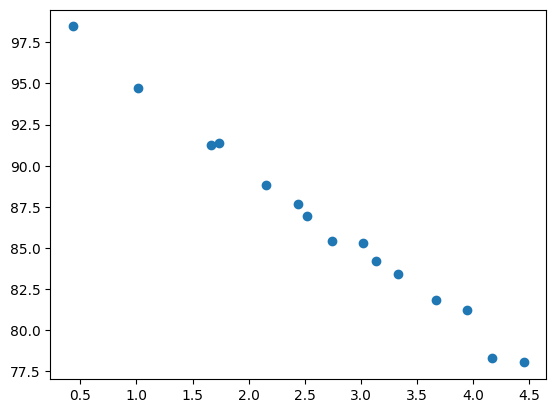

In [3]:
#data that shows a roughly linear relationship between page speed and amount purchased:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 15)
# np.random.normal(mean_of_the_distribution,standart_dev_of_dist,size)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 15))*5

scatter(pageSpeeds, purchaseAmount)

In [4]:
#As we only have two features, we can keep it simple and just use scipy.state.linregress:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [5]:
r_value ** 2

0.9922600377682397

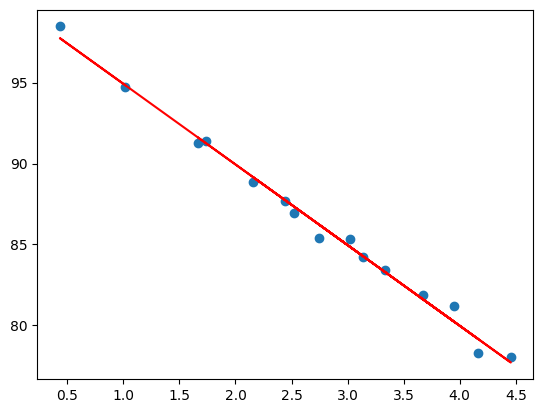

In [6]:
import matplotlib.pyplot as plt
def predict(x):
    return slope * x + intercept  # y = mx + b
fitLine = predict(pageSpeeds)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

In [7]:
#if we have non linear relationship
#y=ax2+bx+c   or y= ax3 + bx2 + cx +d  or more second, "third order polynomials

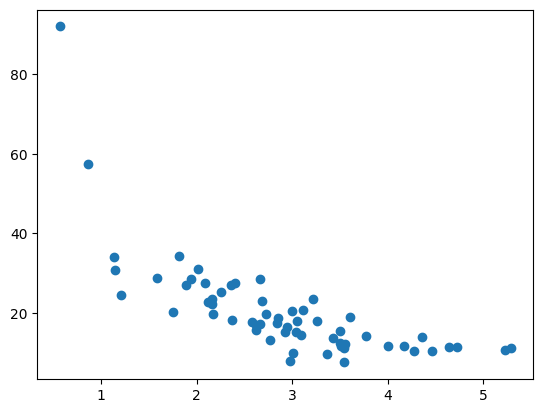

In [8]:
%matplotlib inline
from pylab import *
import numpy as np
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 60)
purchaseAmount = np.random.normal(50.0, 10.0, 60) / pageSpeeds
scatter(pageSpeeds, purchaseAmount)

In [15]:
#numpy has a handy polyfit function we can use, to let us construct an
#nth-degree polynomial model of our data that minimizes squared error
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)
p4 = np.poly1d(np.polyfit(x, y,3))
print(p4)
p4_1 = np.polynomial.polynomial.Polynomial(np.polynomial.polynomial.Polynomial.fit(x, y, 3))
p4_1

        3         2
-1.677 x + 18.79 x - 70.89 x + 104.6


Polynomial([Polynomial([ 15.98359157,  -9.43077681,  22.64967919, -22.13715278], domain=[0.56523242, 5.29220801], window=[-1.,  1.])],
      dtype=object, domain=[-1,  1], window=[-1,  1])

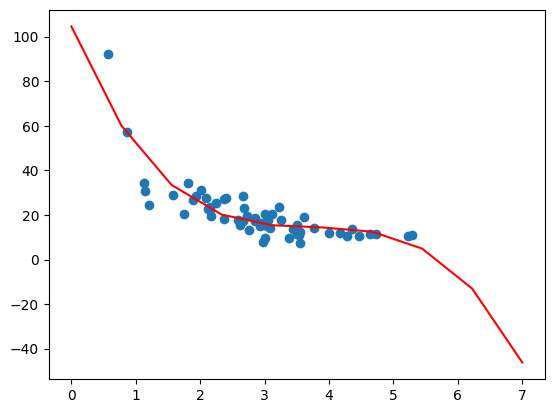

In [10]:
#ranging from 0-7 seconds:
import matplotlib.pyplot as plt
xp = np.linspace(0, 7, 10)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print(r2)

0.773274540872675


In [12]:
# try higher orders to get better fit! play with polynomial values
